## Solar Power Prediction using Linear Regression

In [94]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore

In [95]:
# Load the dataset
df = pd.read_csv('dataset/solarpowergeneration.csv')

# Display the first 5 rows
df.head()

temperature_2_m_above_gnd  relative_humidity_2_m_above_gnd  \
0                       2.17                               31   
1                       2.31                               27   
2                       3.65                               33   
3                       5.82                               30   
4                       7.73                               27   

   mean_sea_level_pressure_MSL  total_precipitation_sfc  snowfall_amount_sfc  \
0                       1035.0                      0.0                  0.0   
1                       1035.1                      0.0                  0.0   
2                       1035.4                      0.0                  0.0   
3                       1035.4                      0.0                  0.0   
4                       1034.4                      0.0                  0.0   

   total_cloud_cover_sfc  high_cloud_cover_high_cld_lay  \
0                    0.0                              0   
1                    0.0                              0   
2                    0.0                              0   
3                    0.0                              0   
4                    0.0                              0   

   medium_cloud_cover_mid_cld_lay  low_cloud_cover_low_cld_lay  \
0                               0                            0   
1                               0                            0   
2                               0                            0   
3                               0                            0   
4                               0                            0   

   shortwave_radiation_backwards_sfc  ...  wind_direction_10_m_above_gnd  \
0                               0.00  ...                         312.71   
1                               1.78  ...                         294.78   
2                             108.58  ...                         270.00   
3                             258.10  ...                         323.13   
4                             375.58  ...                          10.01   

   wind_speed_80_m_above_gnd  wind_direction_80_m_above_gnd  \
0                       9.36                          22.62   
1                       5.99                          32.74   
2                       3.89                          56.31   
3                       3.55                          23.96   
4                       6.76                          25.20   

   wind_speed_900_mb  wind_direction_900_mb  wind_gust_10_m_above_gnd  \
0               6.62                 337.62                     24.48   
1               4.61                 321.34                     21.96   
2               3.76                 286.70                     14.04   
3               3.08                 339.44                     19.80   
4               6.62                  22.38                     16.56   

   angle_of_incidence     zenith    azimuth  generated_power_kw  
0           58.753108  83.237322  128.33543           454.10095  
1           45.408585  75.143041  139.65530          1411.99940  
2           32.848282  68.820648  152.53769          2214.84930  
3           22.699288  64.883536  166.90159          2527.60920  
4           19.199908  63.795208  182.13526          2640.20340  

[5 rows x 21 columns]

In [96]:
# To check the number of rows and columns
df.shape

(4213, 21)

In [97]:
# To display the summary
df.describe()

temperature_2_m_above_gnd  relative_humidity_2_m_above_gnd  \
count                4213.000000                      4213.000000   
mean                   15.068111                        51.361025   
std                     8.853677                        23.525864   
min                    -5.350000                         7.000000   
25%                     8.390000                        32.000000   
50%                    14.750000                        48.000000   
75%                    21.290000                        70.000000   
max                    34.900000                       100.000000   

       mean_sea_level_pressure_MSL  total_precipitation_sfc  \
count                  4213.000000              4213.000000   
mean                   1019.337812                 0.031759   
std                       7.022867                 0.170212   
min                     997.500000                 0.000000   
25%                    1014.500000                 0.000000   
50%                    1018.100000                 0.000000   
75%                    1023.600000                 0.000000   
max                    1046.800000                 3.200000   

       snowfall_amount_sfc  total_cloud_cover_sfc  \
count          4213.000000            4213.000000   
mean              0.002808              34.056990   
std               0.038015              42.843638   
min               0.000000               0.000000   
25%               0.000000               0.000000   
50%               0.000000               8.700000   
75%               0.000000             100.000000   
max               1.680000             100.000000   

       high_cloud_cover_high_cld_lay  medium_cloud_cover_mid_cld_lay  \
count                    4213.000000                     4213.000000   
mean                       14.458818                       20.023499   
std                        30.711707                       36.387948   
min                         0.000000                        0.000000   
25%                         0.000000                        0.000000   
50%                         0.000000                        0.000000   
75%                         9.000000                       10.000000   
max                       100.000000                      100.000000   

       low_cloud_cover_low_cld_lay  shortwave_radiation_backwards_sfc  ...  \
count                  4213.000000                        4213.000000  ...   
mean                     21.373368                         387.759036  ...   
std                      38.013885                         278.459293  ...   
min                       0.000000                           0.000000  ...   
25%                       0.000000                         142.400000  ...   
50%                       0.000000                         381.810000  ...   
75%                      10.000000                         599.860000  ...   
max                     100.000000                         952.300000  ...   

       wind_direction_10_m_above_gnd  wind_speed_80_m_above_gnd  \
count                    4213.000000                4213.000000   
mean                      195.078452                  18.978483   
std                       106.626782                  11.999960   
min                         0.540000                   0.000000   
25%                       153.190000                  10.140000   
50%                       191.770000                  16.240000   
75%                       292.070000                  26.140000   
max                       360.000000                  66.880000   

       wind_direction_80_m_above_gnd  wind_speed_900_mb  \
count                    4213.000000         4213.00000   
mean                      191.166862           16.36319   
std                       108.760021            9.88533   
min                         1.120000            0.00000   
25%                       130.240000            9.18000   
50%                       187

In [98]:
# To check the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4213 entries, 0 to 4212
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   temperature_2_m_above_gnd          4213 non-null   float64
 1   relative_humidity_2_m_above_gnd    4213 non-null   int64  
 2   mean_sea_level_pressure_MSL        4213 non-null   float64
 3   total_precipitation_sfc            4213 non-null   float64
 4   snowfall_amount_sfc                4213 non-null   float64
 5   total_cloud_cover_sfc              4213 non-null   float64
 6   high_cloud_cover_high_cld_lay      4213 non-null   int64  
 7   medium_cloud_cover_mid_cld_lay     4213 non-null   int64  
 8   low_cloud_cover_low_cld_lay        4213 non-null   int64  
 9   shortwave_radiation_backwards_sfc  4213 non-null   float64
 10  wind_speed_10_m_above_gnd          4213 non-null   float64
 11  wind_direction_10_m_above_gnd      4213 non-null   float

In [99]:
# Check for the missing values
df.isnull()

temperature_2_m_above_gnd  relative_humidity_2_m_above_gnd  \
0                         False                            False   
1                         False                            False   
2                         False                            False   
3                         False                            False   
4                         False                            False   
...                         ...                              ...   
4208                      False                            False   
4209                      False                            False   
4210                      False                            False   
4211                      False                            False   
4212                      False                            False   

      mean_sea_level_pressure_MSL  total_precipitation_sfc  \
0                           False                    False   
1                           False                    False   
2                           False                    False   
3                           False                    False   
4                           False                    False   
...                           ...                      ...   
4208                        False                    False   
4209                        False                    False   
4210                        False                    False   
4211                        False                    False   
4212                        False                    False   

      snowfall_amount_sfc  total_cloud_cover_sfc  \
0                   False                  False   
1                   False                  False   
2                   False                  False   
3                   False                  False   
4                   False                  False   
...                   ...                    ...   
4208                False                  False   
4209                False                  False   
4210                False                  False   
4211                False                  False   
4212                False                  False   

      high_cloud_cover_high_cld_lay  medium_cloud_cover_mid_cld_lay  \
0                             False                           False   
1                             False                           False   
2                             False                           False   
3                             False                           False   
4                             False                           False   
...                             ...                             ...   
4208                          False                           False   
4209                          False                           False   
4210                          False                           False   
4211                          False                           False   
4212                          False                           False   

      low_cloud_cover_low_cld_lay  shortwave_radiation_backwards_sfc  ...  \
0                           False                              False  ...   
1                           False                              False  ...   
2                           False                              False  ...   
3                           False                              False  ...   
4                           False                              False  ...   
...                           ...                                ...  ...   
4208                        False                              False  ...   
4209                        False                              False  ...   
4210                        False                              False  ...   
4211                        False                              False  ...   
4212                        False                              False  ...   

      wind_direction_10_m_above_gnd  wind

In [100]:
# Check duplicate values
df.duplicated().sum()

np.int64(0)

In [101]:
# Columns in the dataset
df.columns

Index(['temperature_2_m_above_gnd', 'relative_humidity_2_m_above_gnd',
       'mean_sea_level_pressure_MSL', 'total_precipitation_sfc',
       'snowfall_amount_sfc', 'total_cloud_cover_sfc',
       'high_cloud_cover_high_cld_lay', 'medium_cloud_cover_mid_cld_lay',
       'low_cloud_cover_low_cld_lay', 'shortwave_radiation_backwards_sfc',
       'wind_speed_10_m_above_gnd', 'wind_direction_10_m_above_gnd',
       'wind_speed_80_m_above_gnd', 'wind_direction_80_m_above_gnd',
       'wind_speed_900_mb', 'wind_direction_900_mb',
       'wind_gust_10_m_above_gnd', 'angle_of_incidence', 'zenith', 'azimuth',
       'generated_power_kw'],
      dtype='object')

In [102]:
# Handle Outliers using Z-Score
print("\nShape Before Removing Outliers:", df.shape)
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
z_scores = np.abs(zscore(df[numerical_cols]))
df = df[(z_scores < 3).all(axis=1)]
print("Shape After Removing Outliers:", df.shape)



Shape Before Removing Outliers: (4213, 21)
Shape After Removing Outliers: (4019, 21)


In [103]:
# Normalize/Scale Continuous Variables

df_normalized = df.copy()

scaler = MinMaxScaler()
df_normalized[numerical_cols] = scaler.fit_transform(df_normalized[numerical_cols])

print("\nData Normalized Successfully!")



Data Normalized Successfully!


In [104]:
# Feature Engineering
df['total_cloud_cover_index'] = (df['high_cloud_cover_high_cld_lay'] + df['medium_cloud_cover_mid_cld_lay'] + df['low_cloud_cover_low_cld_lay'])/3

print("\nFeature 'total_cloud_cover_index' Added Successfully!")


Feature 'total_cloud_cover_index' Added Successfully!


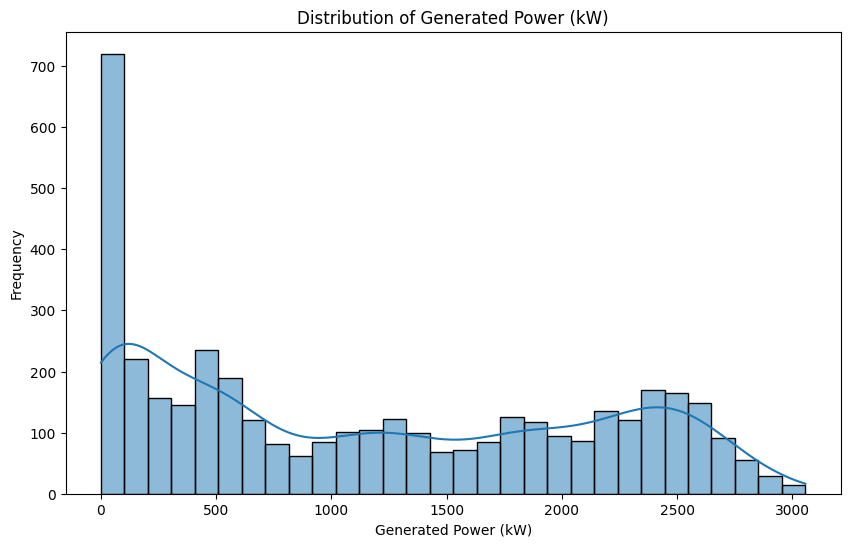

In [105]:
import matplotlib.pyplot as plt

# Univariate Analysis

# Plot distribution of power
plt.figure(figsize=(10,6))
sns.histplot(df['generated_power_kw'], bins=30, kde=True)     # bins are the bars, kde - kernel density estimation(line)
plt.title('Distribution of Generated Power (kW)')
plt.xlabel('Generated Power (kW)')
plt.ylabel('Frequency')
plt.show()


Visualizing Correlation Matrix


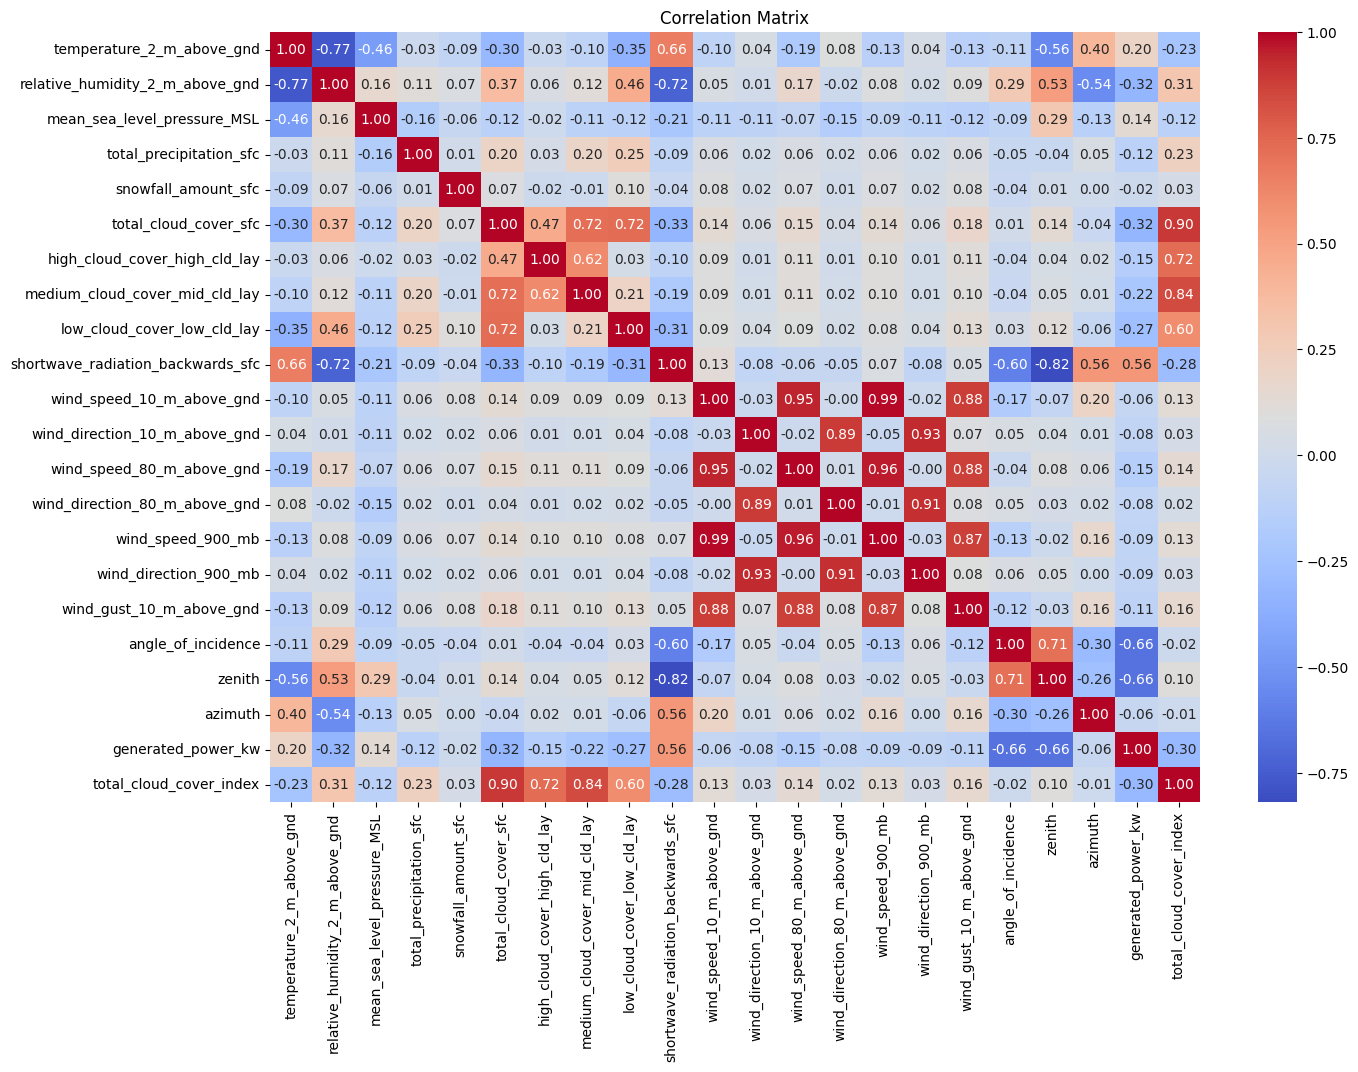

In [106]:
# Correlation Matrix
print("\nVisualizing Correlation Matrix")
plt.figure(figsize=(15, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

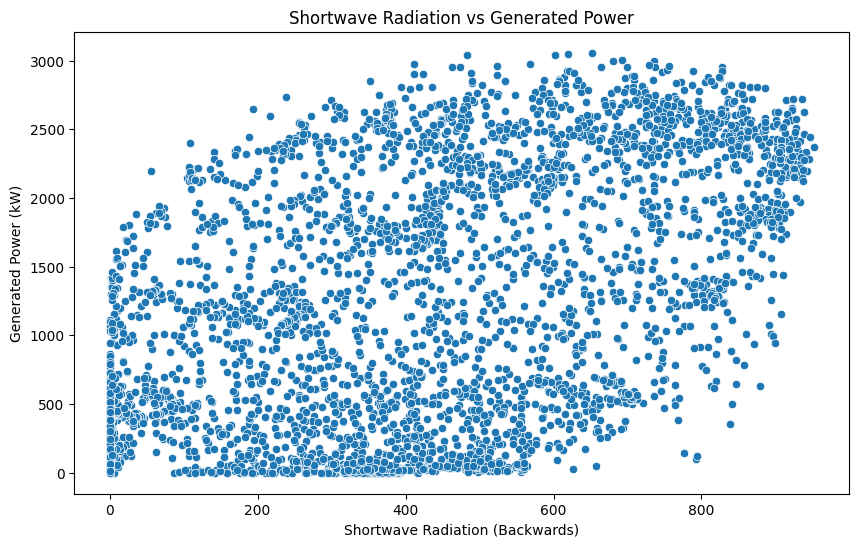

In [107]:
# Bivariate Analysis: Shortwave Radiation vs Generated Power
plt.figure(figsize=(10, 6))
sns.scatterplot(x='shortwave_radiation_backwards_sfc', y='generated_power_kw', data=df)
plt.title("Shortwave Radiation vs Generated Power")
plt.xlabel("Shortwave Radiation (Backwards)")
plt.ylabel("Generated Power (kW)")
plt.show()

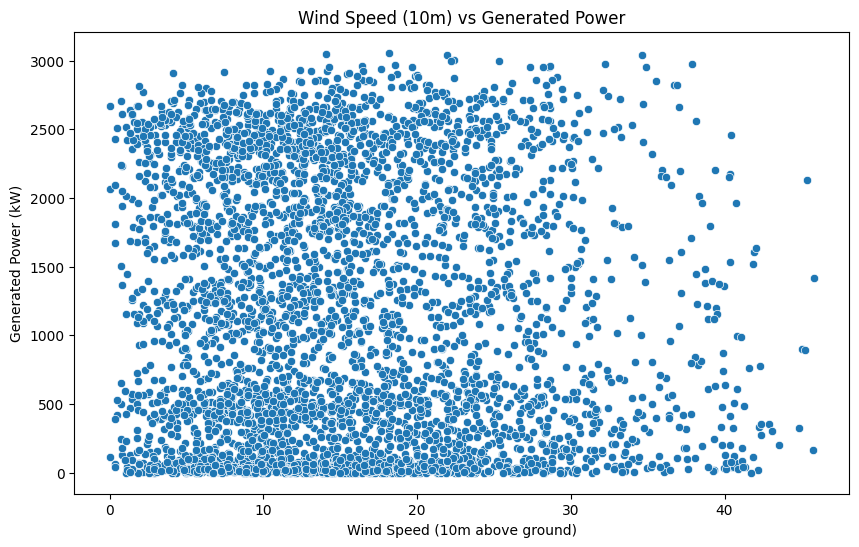

In [108]:
# Wind Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='wind_speed_10_m_above_gnd', y='generated_power_kw', data=df)
plt.title("Wind Speed (10m) vs Generated Power")
plt.xlabel("Wind Speed (10m above ground)")
plt.ylabel("Generated Power (kW)")
plt.show()

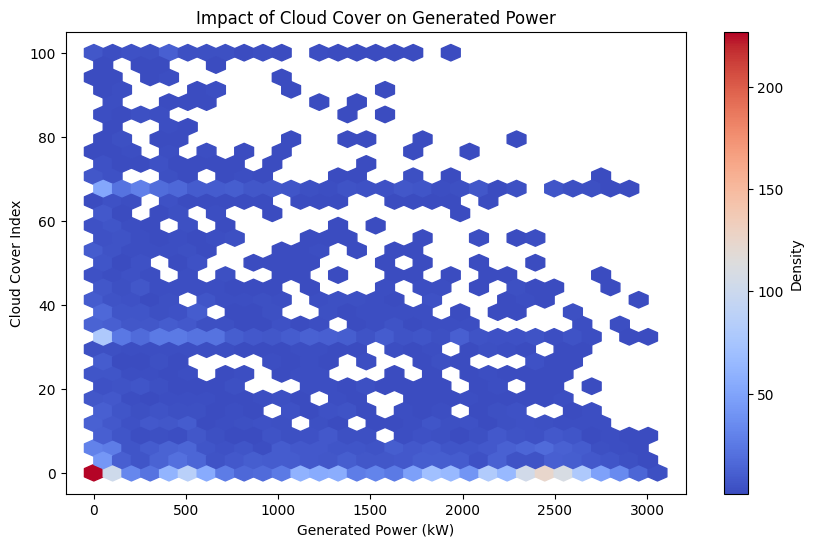

In [109]:
# Impact of Cloud Cover on Generated Power using hexbin
plt.figure(figsize=(10, 6))
plt.hexbin(df['generated_power_kw'], df['total_cloud_cover_index'], gridsize=30, cmap='coolwarm', mincnt=1)
plt.colorbar(label="Density")
plt.title("Impact of Cloud Cover on Generated Power")
plt.xlabel("Generated Power (kW)")
plt.ylabel("Cloud Cover Index")
plt.show()


## EDA (Week 2)

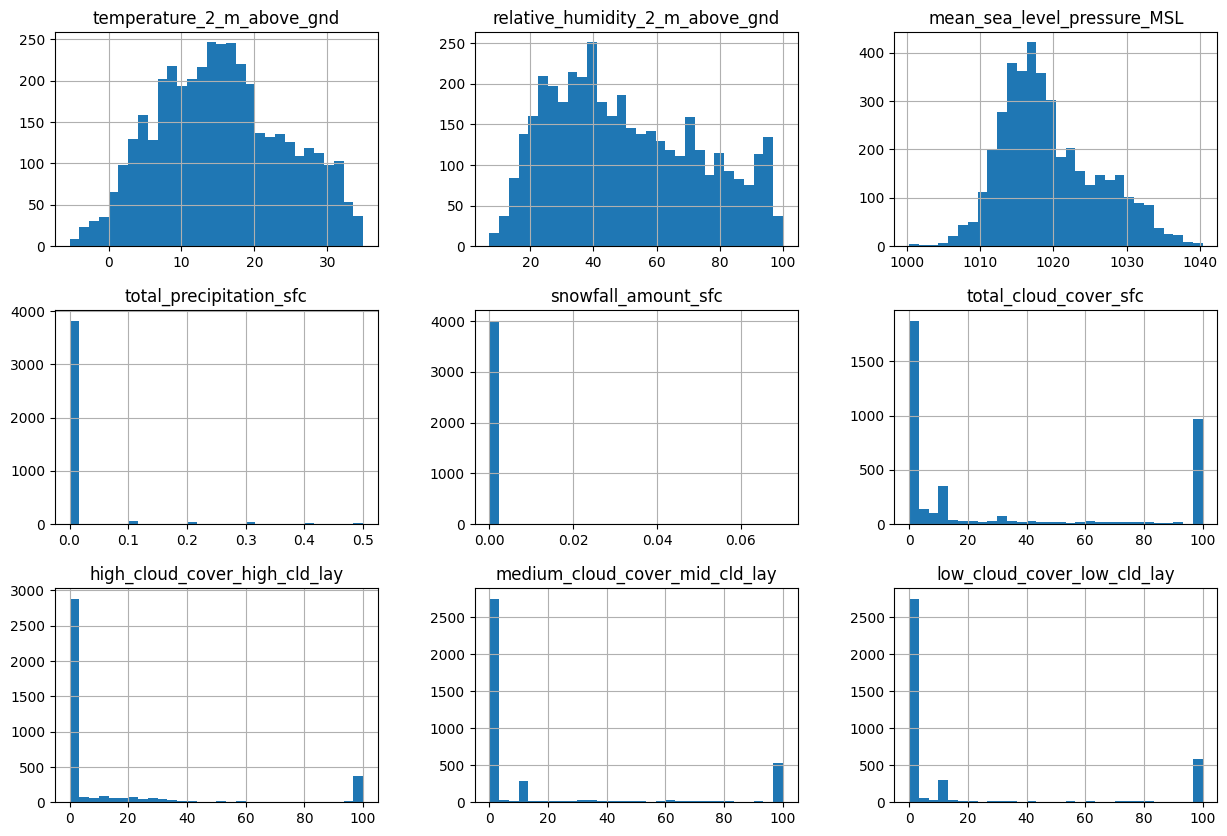

In [110]:
df[df.columns[:9]].hist(bins=30, figsize=(15, 10))
plt.show()

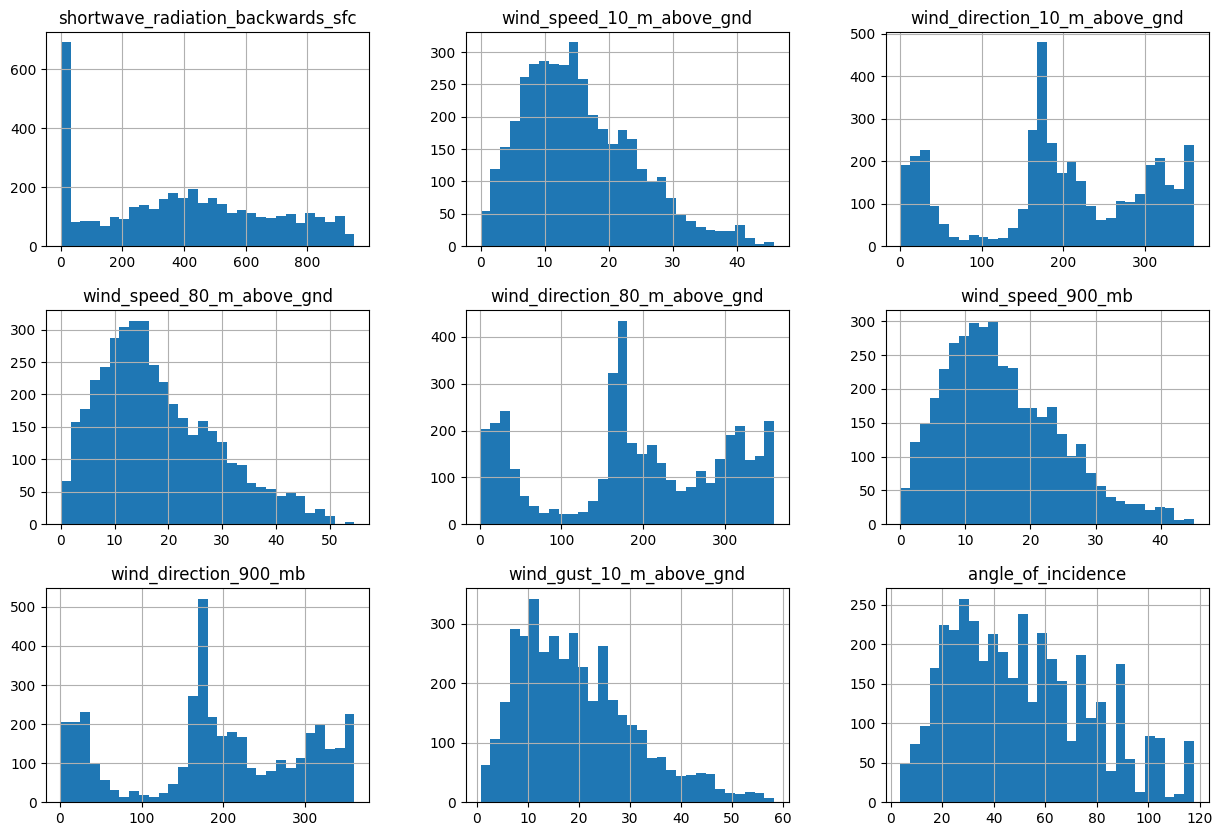

In [111]:
df[df.columns[9:18]].hist(bins=30, figsize=(15, 10))
plt.show()

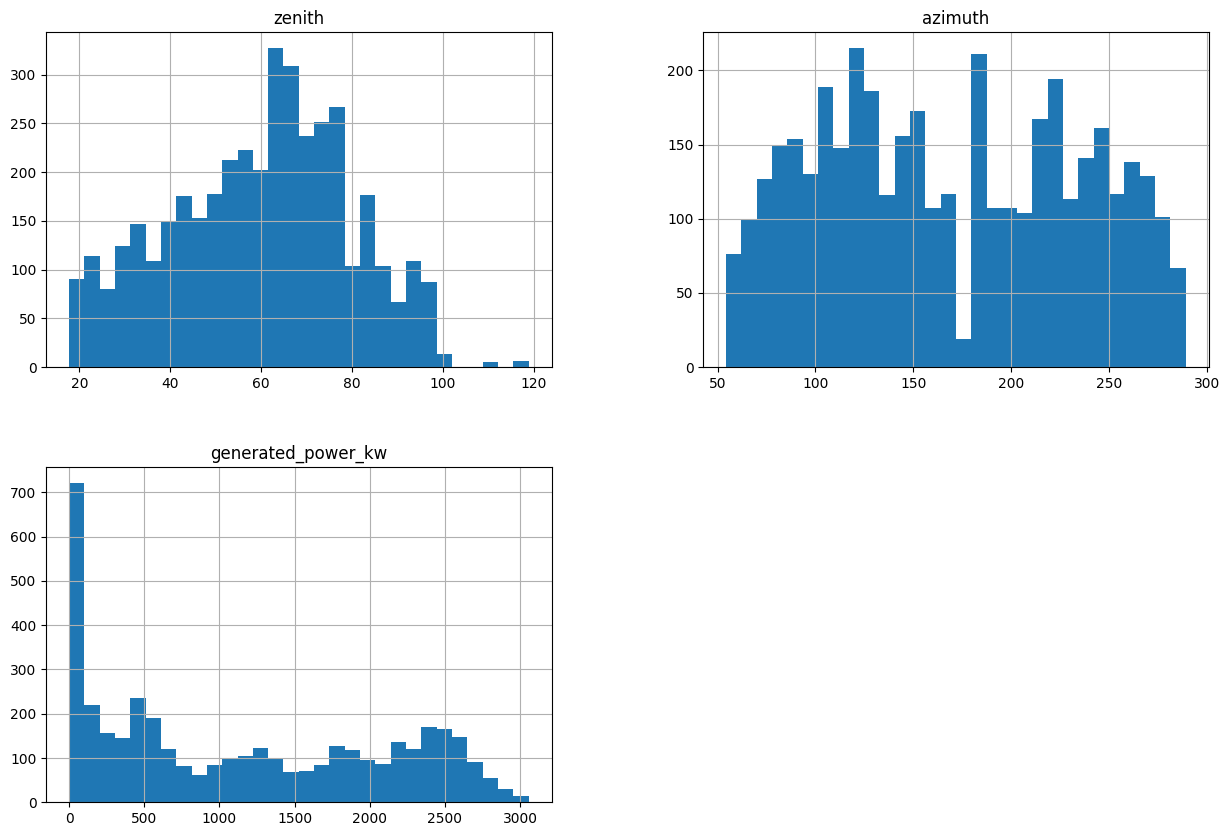

In [112]:
df[df.columns[18:21]].hist(bins=30, figsize=(15,10))
plt.show()

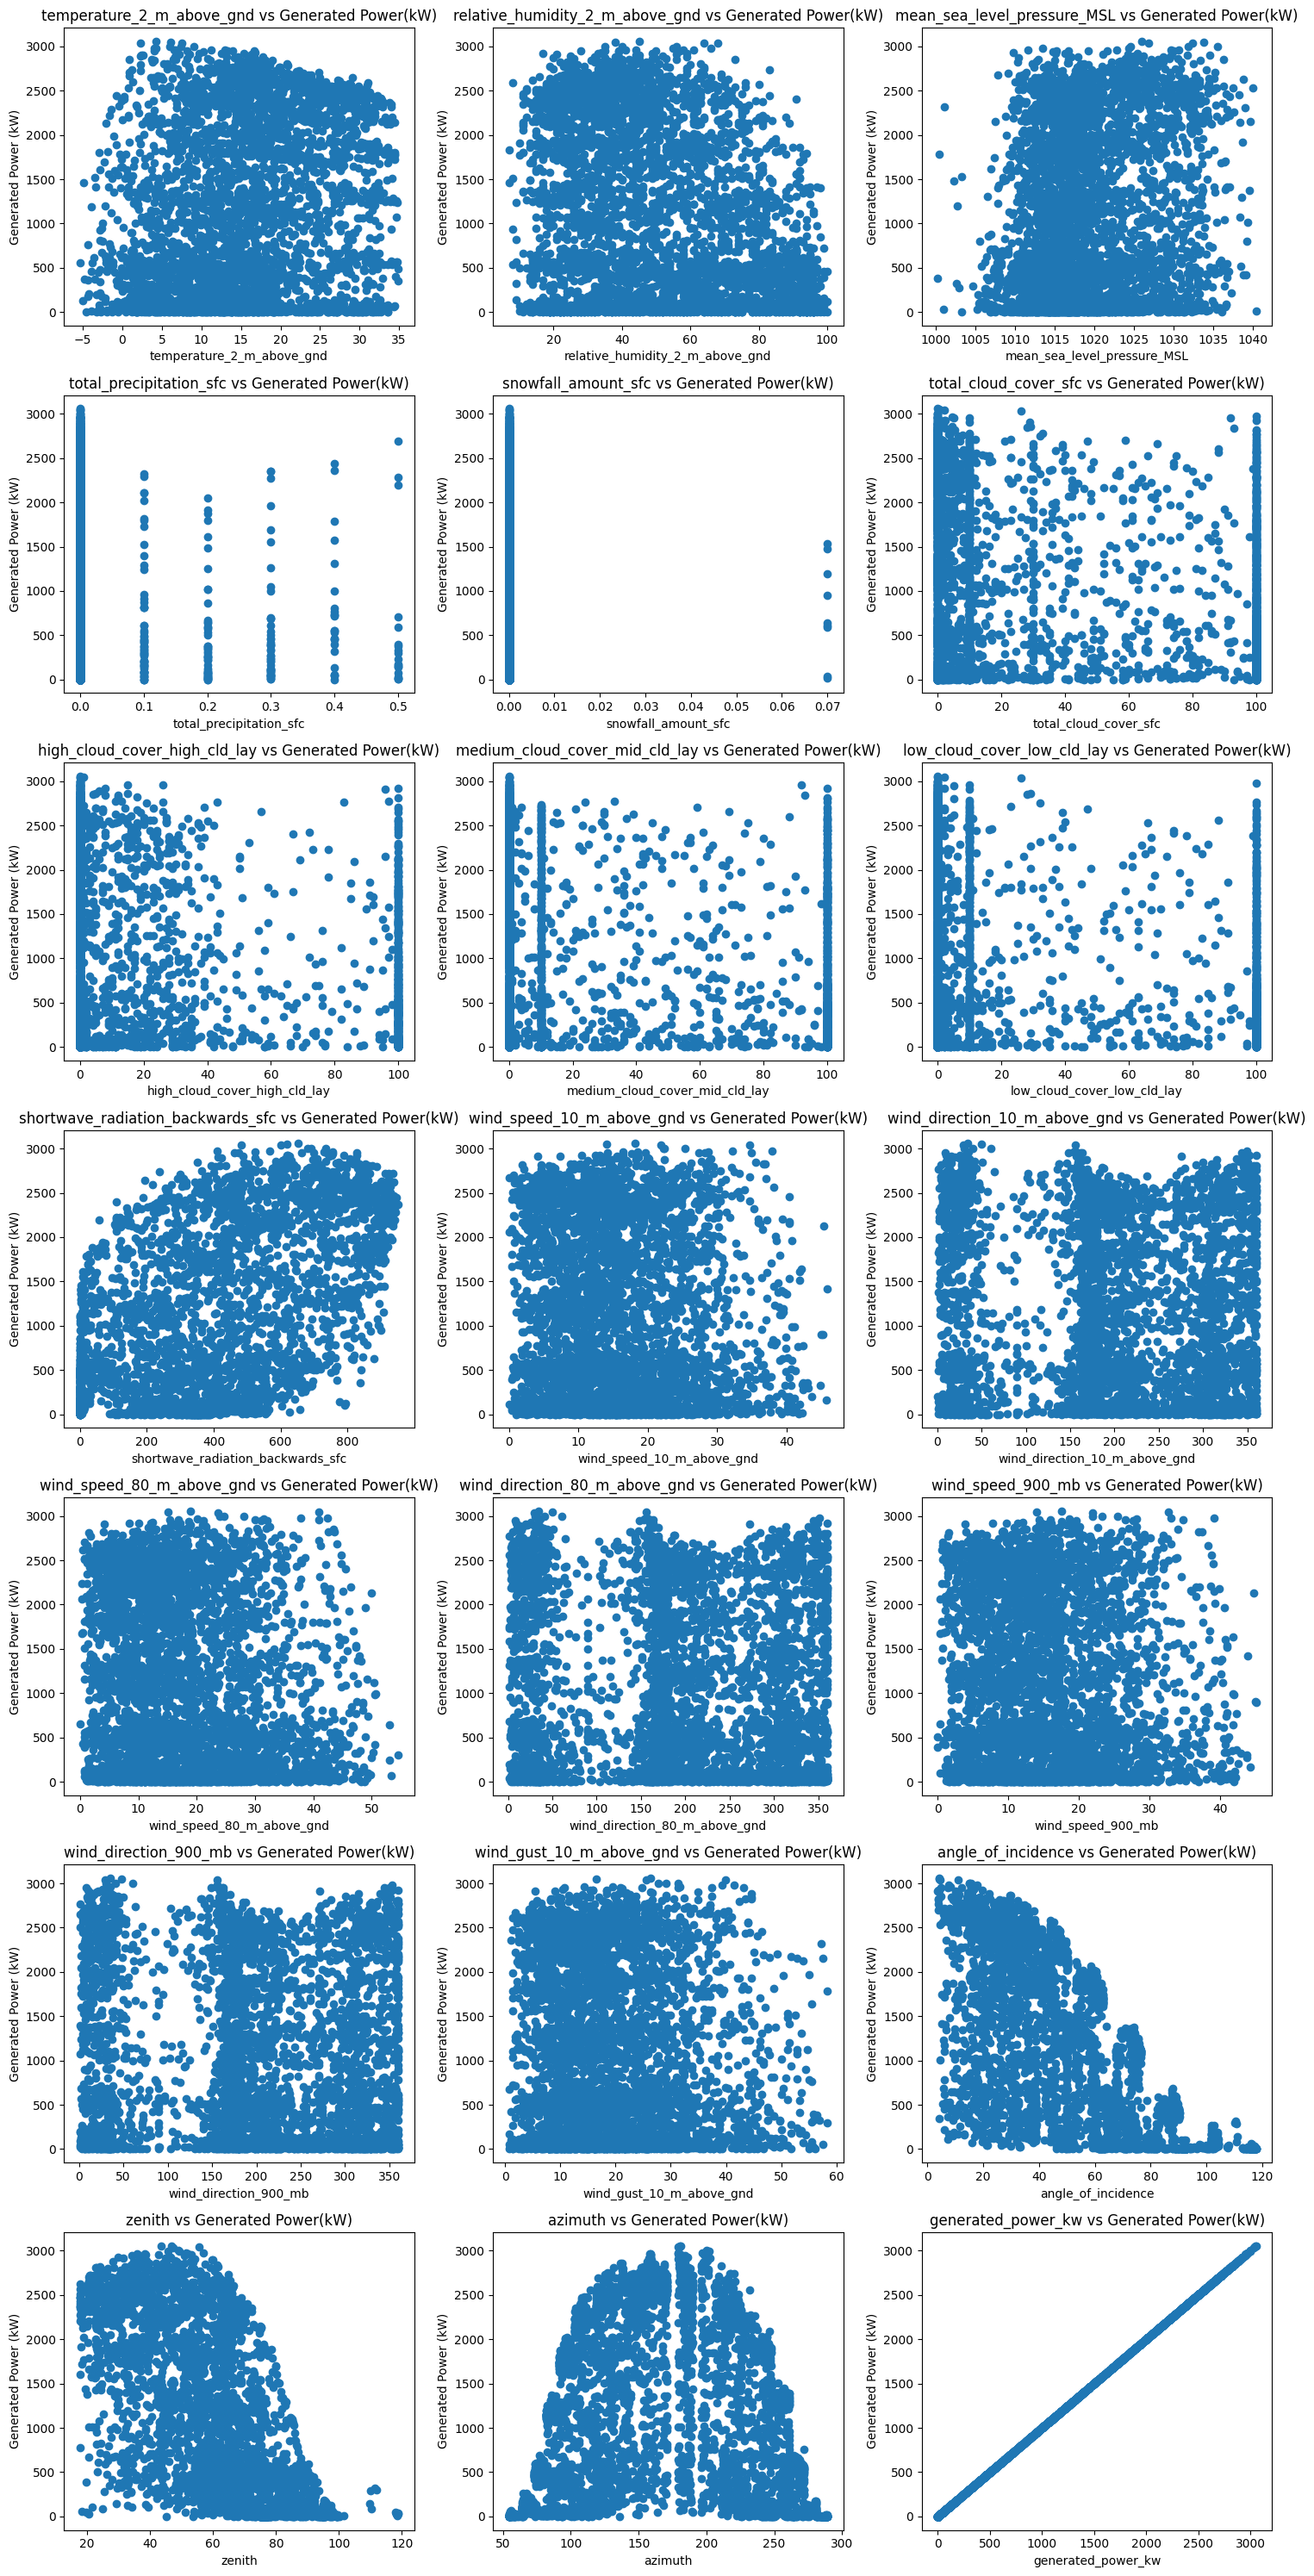

In [113]:
# Bivariate Analysis
# Scatter plot with target feature

plt.figure(figsize=(15, 30))
for i, column in enumerate(df.columns):
    if i < 21:
        plt.subplot(7, 3,i+1)
        plt.scatter(df[column], df['generated_power_kw'])
        plt.title(f'{column} vs Generated Power(kW)')
        plt.xlabel(column)
        plt.ylabel('Generated Power (kW)')
plt.tight_layout()
plt.show()

In [114]:
# Correlations
df.corr

<bound method DataFrame.corr of       temperature_2_m_above_gnd  relative_humidity_2_m_above_gnd  \
0                          2.17                               31   
1                          2.31                               27   
2                          3.65                               33   
3                          5.82                               30   
4                          7.73                               27   
...                         ...                              ...   
4208                       8.69                               66   
4209                       7.57                               90   
4210                       7.27                               90   
4211                       8.25                               81   
4212                       8.00                               80   

      mean_sea_level_pressure_MSL  total_precipitation_sfc  \
0                          1035.0                      0.0   
1                          

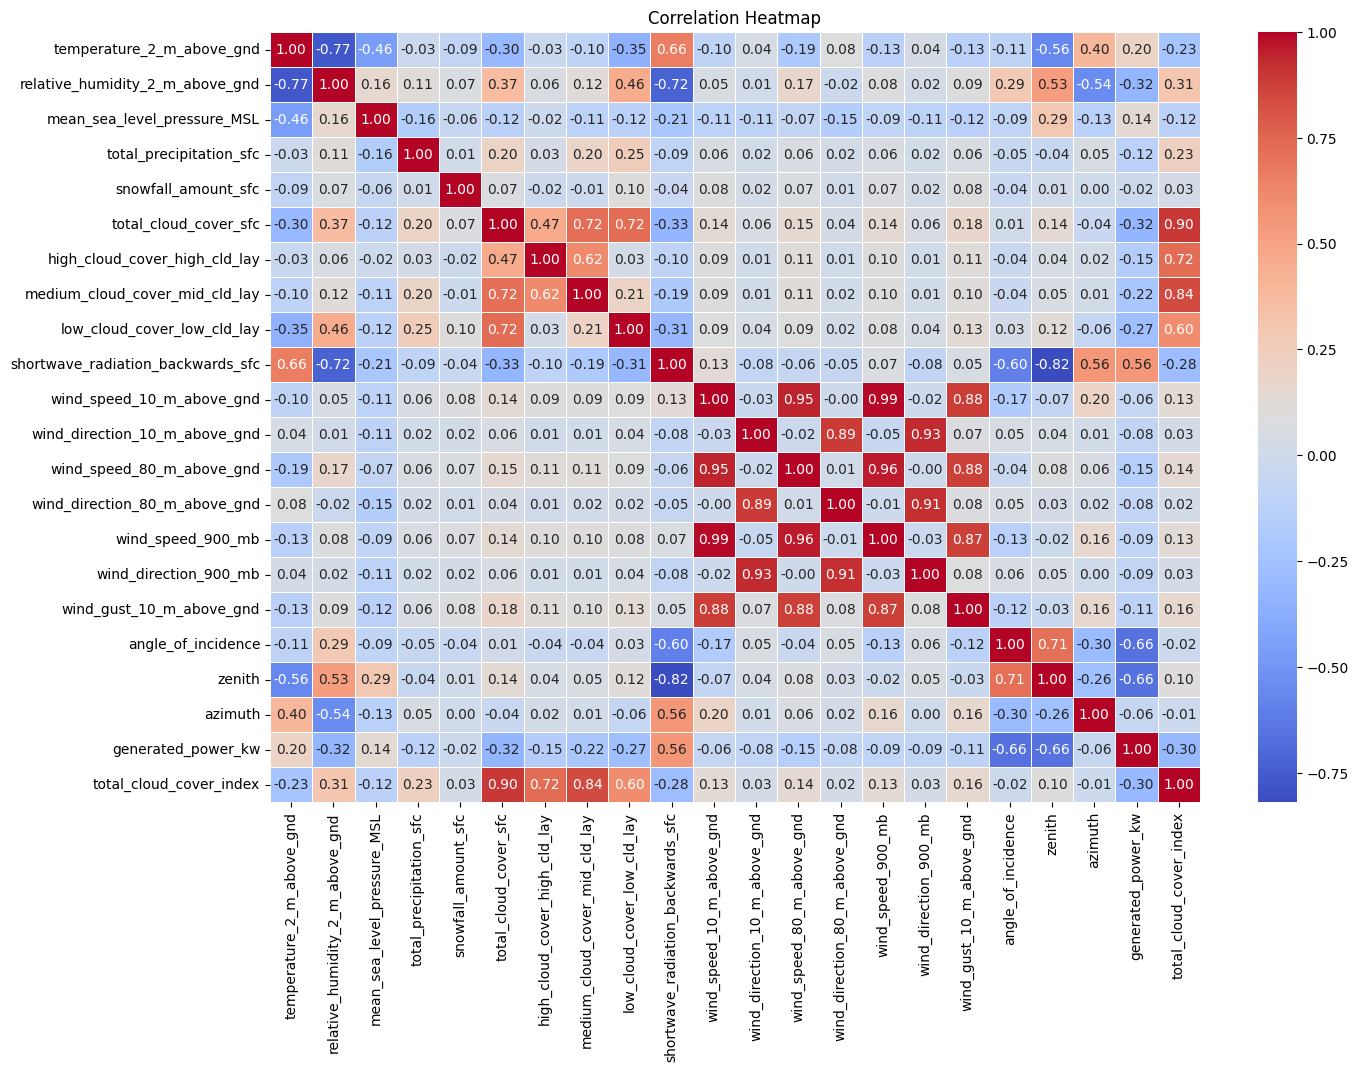

In [115]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

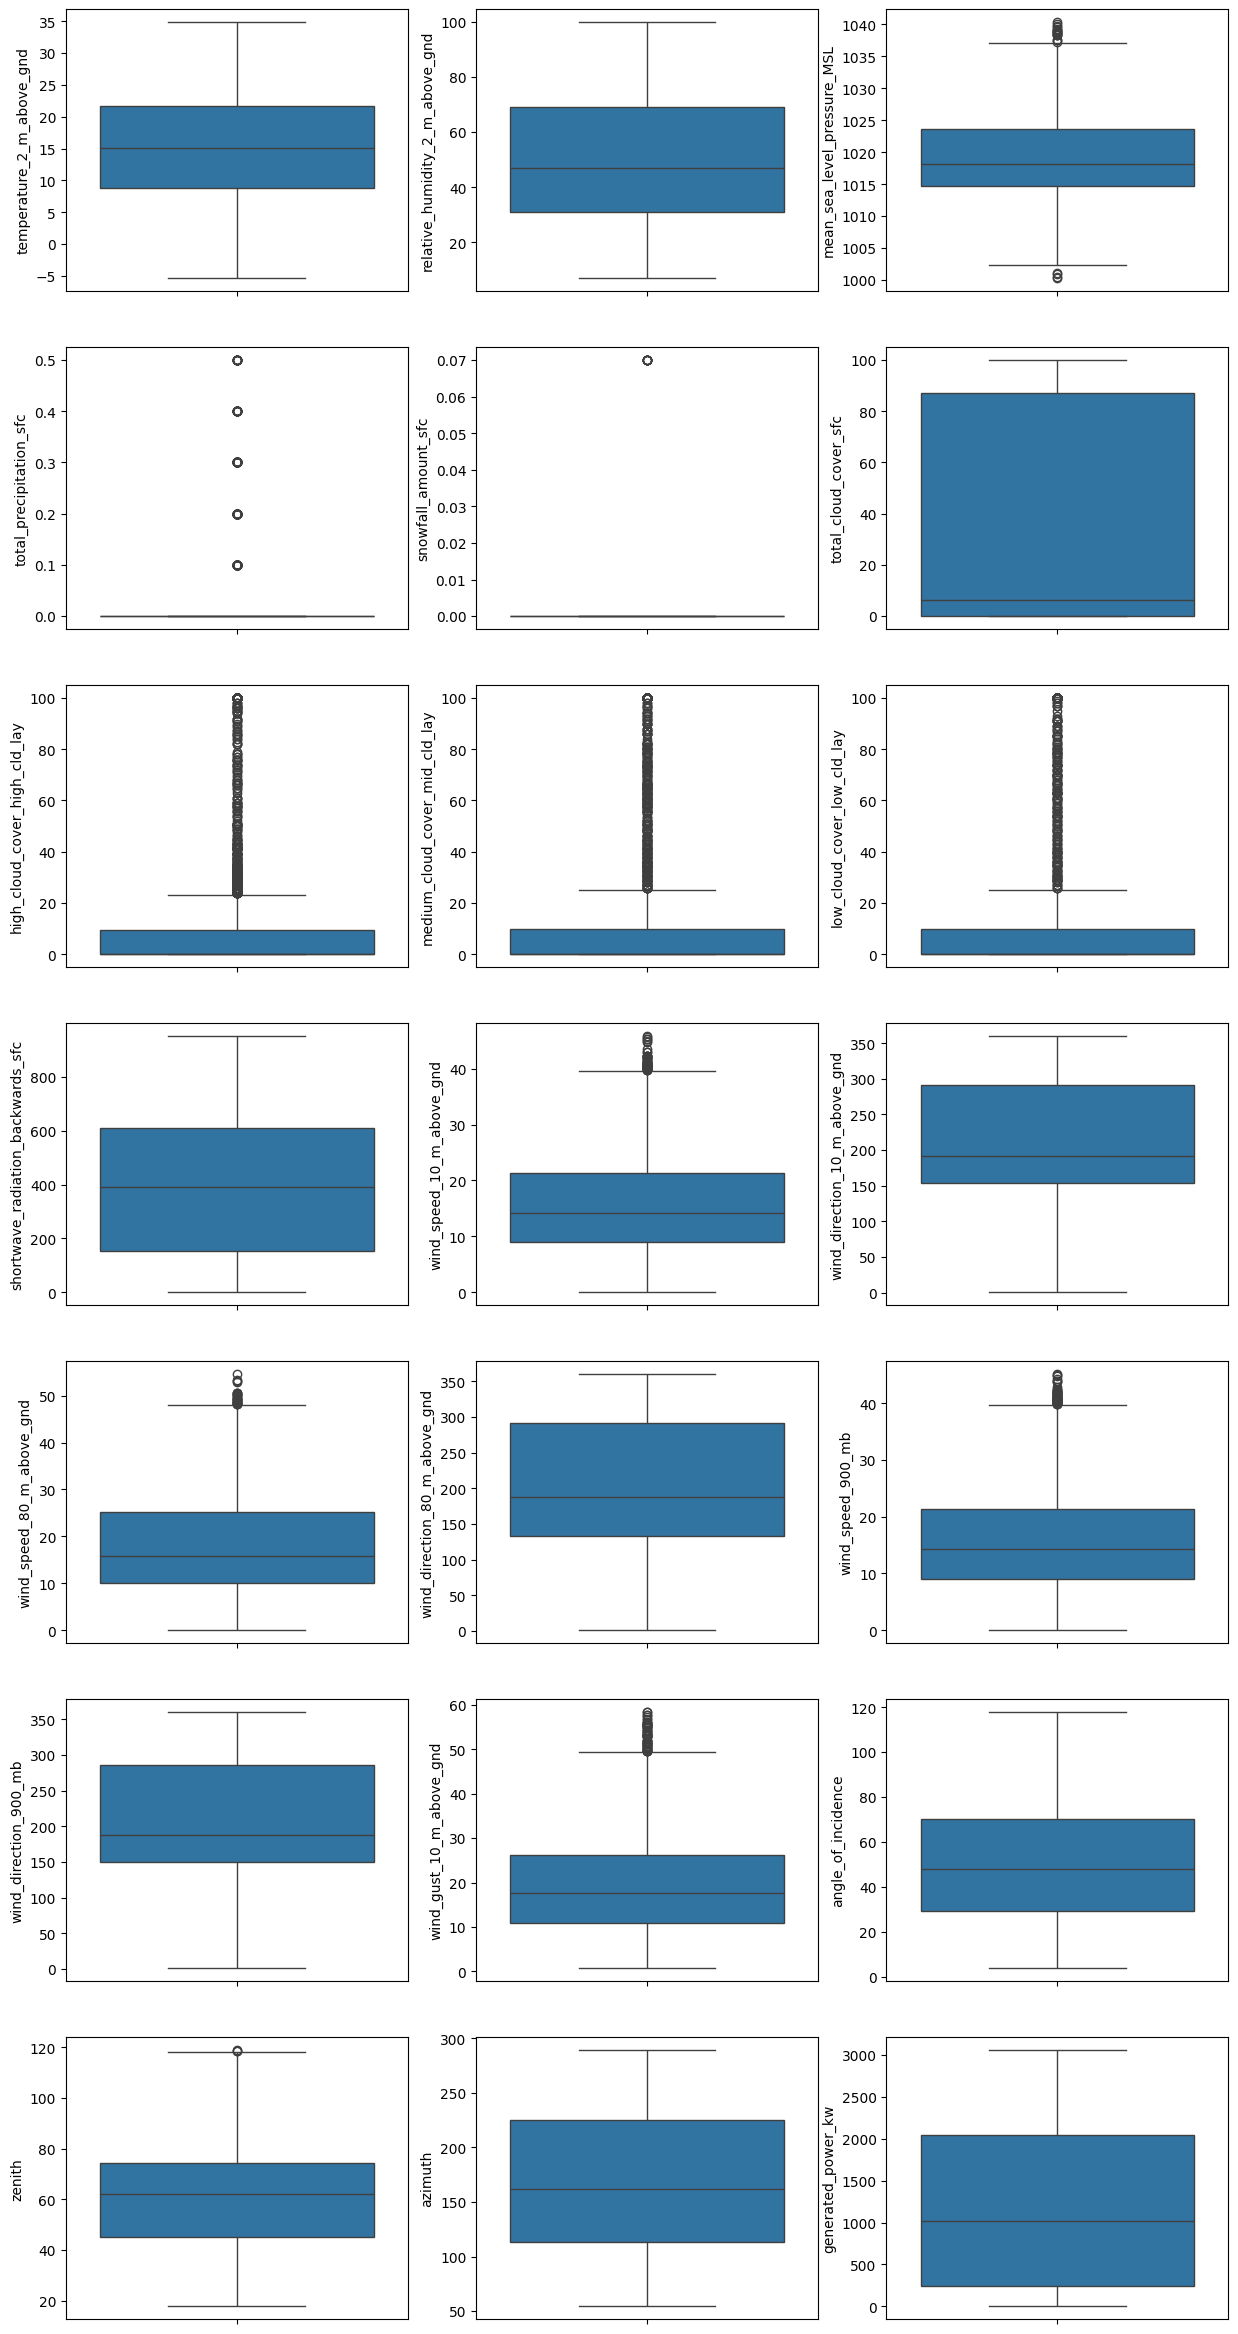

In [116]:
# Outlier
plt.figure(figsize=(15,30))
for i, column in enumerate(df.columns):
    if i < 21:
        plt.subplot(7,3,i+1)
        sns.boxplot(df[column])
plt.show()

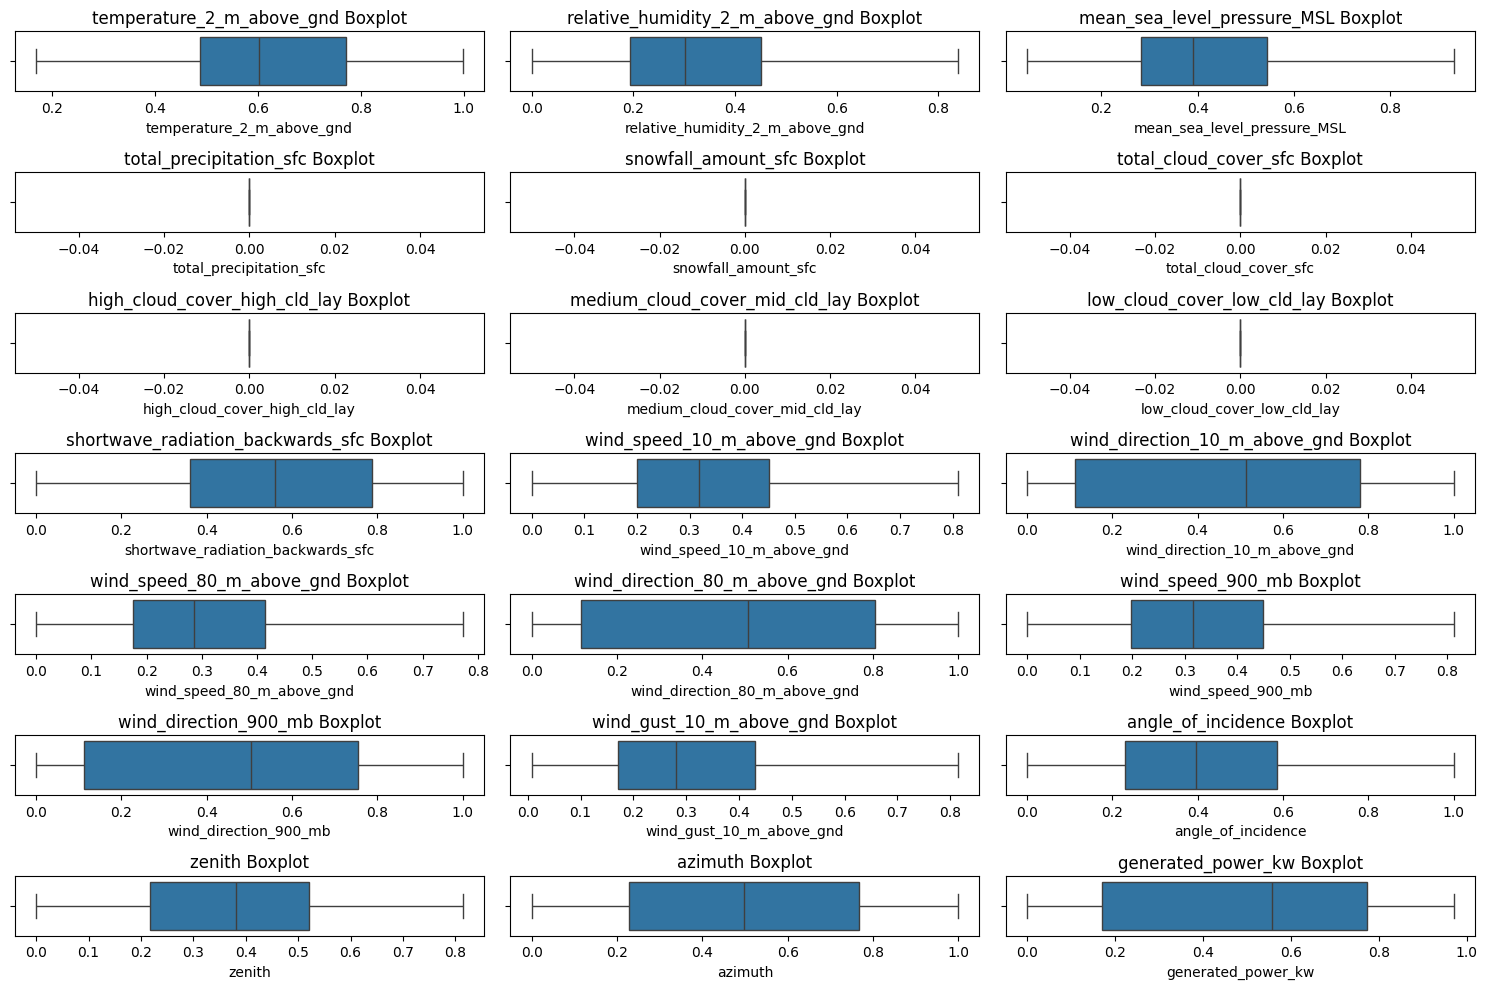

In [140]:
# Outlier Handling (IQR method)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Remove rows with outliers
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns):
    if i < 21: 
        plt.subplot(7, 3, i + 1)
        sns.boxplot(x=df[column])
        plt.title(f'{column} Boxplot')
plt.tight_layout()
plt.show()

In [118]:
# Feature Engineering

# 'Power-to-Weather Ratio' (to see correlation with power generation)
df['power_to_weather_ratio'] = df['generated_power_kw'] / (df['temperature_2_m_above_gnd'] + 1)  # Adding 1 to avoid division by 0

C:\Users\hp\AppData\Local\Temp\ipykernel_7832\1163791922.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['power_to_weather_ratio'] = df['generated_power_kw'] / (df['temperature_2_m_above_gnd'] + 1)  # Adding 1 to avoid division by 0


C:\Users\hp\AppData\Local\Temp\ipykernel_7832\1971603826.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df.columns] = scaler.fit_transform(df[df.columns])
C:\Users\hp\AppData\Local\Temp\ipykernel_7832\1971603826.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df.columns] = min_max_scaler.fit_transform(df[df.columns])


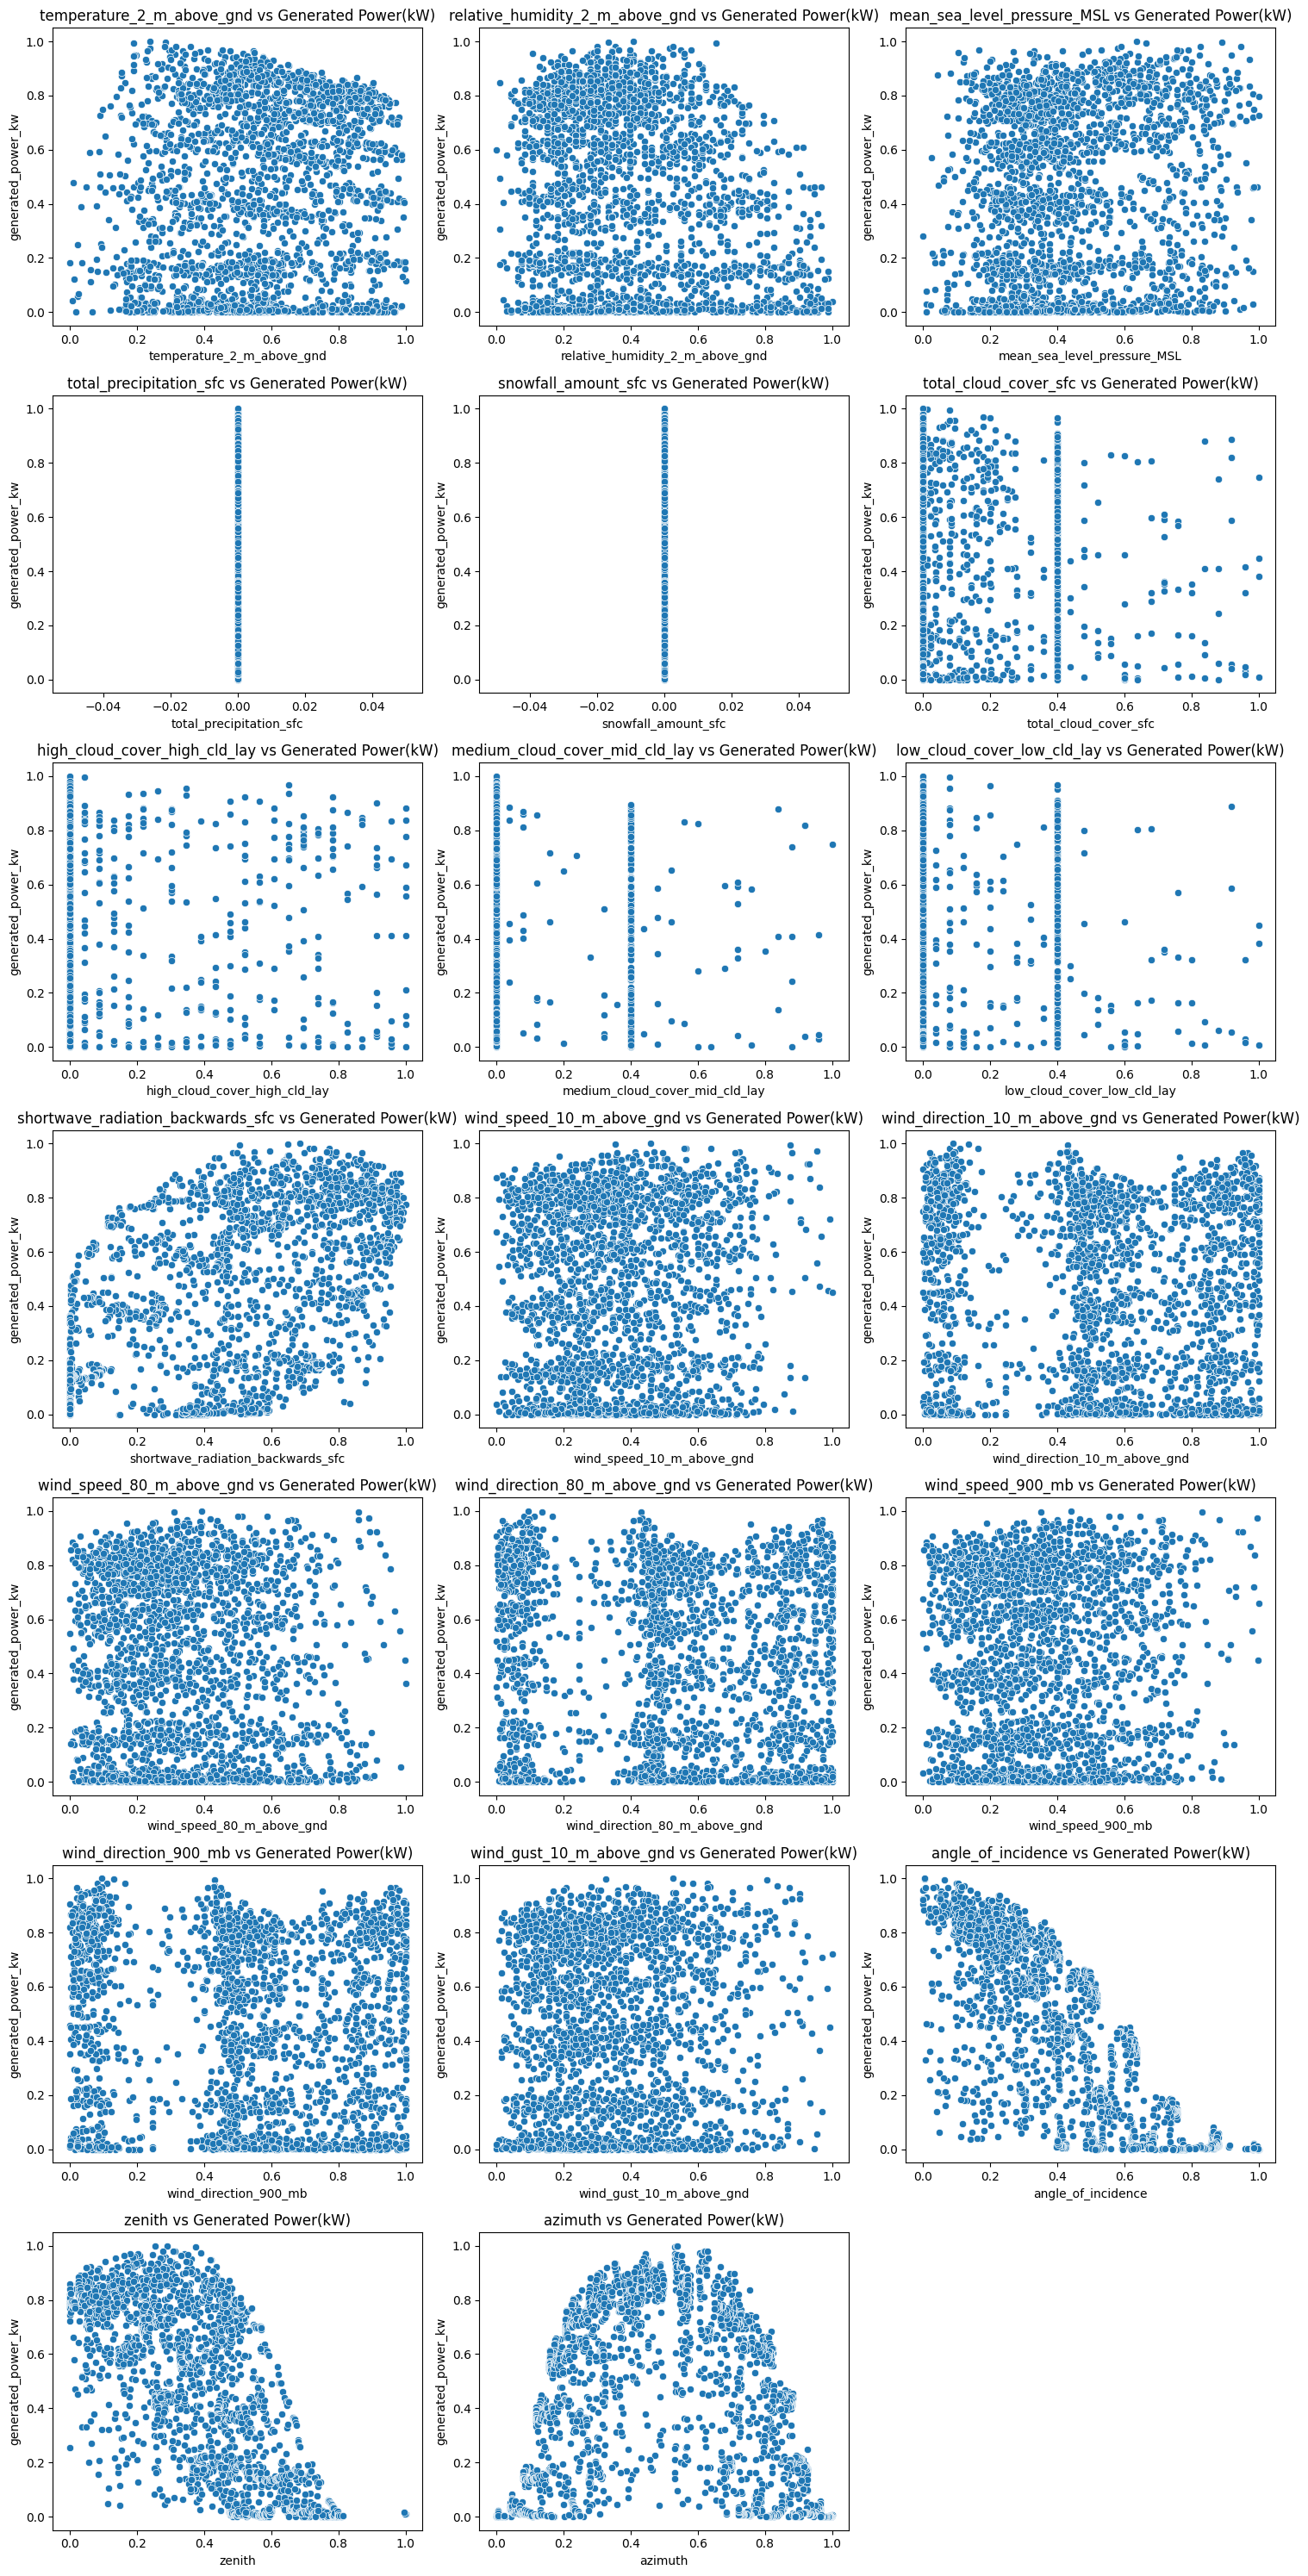

In [119]:
# Data Transformation
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
df[df.columns] = scaler.fit_transform(df[df.columns])
min_max_scaler = MinMaxScaler()
df[df.columns] = min_max_scaler.fit_transform(df[df.columns])


# Visualizing relationships between engineered features and target variable
plt.figure(figsize=(15, 30))
for i, column in enumerate(df.columns):
    if column != 'generated_power_kw':  # Avoid plotting target variable vs itself
        if i < 21:
            plt.subplot(7, 3, i + 1)
            sns.scatterplot(x=df[column], y=df['generated_power_kw'])
            plt.title(f'{column} vs Generated Power(kW)')
plt.tight_layout()
plt.show()

## Machine Learning Model to predict the Solar Power Output

In [120]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [121]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [122]:
df.columns

Index(['temperature_2_m_above_gnd', 'relative_humidity_2_m_above_gnd',
       'mean_sea_level_pressure_MSL', 'total_precipitation_sfc',
       'snowfall_amount_sfc', 'total_cloud_cover_sfc',
       'high_cloud_cover_high_cld_lay', 'medium_cloud_cover_mid_cld_lay',
       'low_cloud_cover_low_cld_lay', 'shortwave_radiation_backwards_sfc',
       'wind_speed_10_m_above_gnd', 'wind_direction_10_m_above_gnd',
       'wind_speed_80_m_above_gnd', 'wind_direction_80_m_above_gnd',
       'wind_speed_900_mb', 'wind_direction_900_mb',
       'wind_gust_10_m_above_gnd', 'angle_of_incidence', 'zenith', 'azimuth',
       'generated_power_kw', 'total_cloud_cover_index',
       'power_to_weather_ratio'],
      dtype='object')

In [123]:
# Spliting the dataset into features and target variable
X = df.drop('generated_power_kw', axis=1)        # axis = 1 means column
y = df['generated_power_kw']

In [124]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [125]:
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # to avoid data leakages

In [126]:
# Train the model
model = LinearRegression()
model.fit(X_train_scaled,y_train)

LinearRegression()

In [127]:
# Predict on training and test data
y_test_pred = model.predict(X_test_scaled)
y_train_pred = model.predict(X_train_scaled)

In [128]:
# Calculate evaluation metrics
def evaluate_model(y_true, y_pred, dataset_type="Test"):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n{dataset_type} Data Evaluation:")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R-squared Score (R2): {r2:.4f}")


print("\nEvaluating Model Performance:")

# Evaluate on training data
evaluate_model(y_train, y_train_pred, dataset_type="Training")

# Evaluate on test data
evaluate_model(y_test, y_test_pred, dataset_type="Test")



Evaluating Model Performance:

Training Data Evaluation:
Mean Absolute Error (MAE): 0.1038
Mean Squared Error (MSE): 0.0207
Root Mean Squared Error (RMSE): 0.1440
R-squared Score (R2): 0.7915

Test Data Evaluation:
Mean Absolute Error (MAE): 0.1001
Mean Squared Error (MSE): 0.0194
Root Mean Squared Error (RMSE): 0.1392
R-squared Score (R2): 0.8080


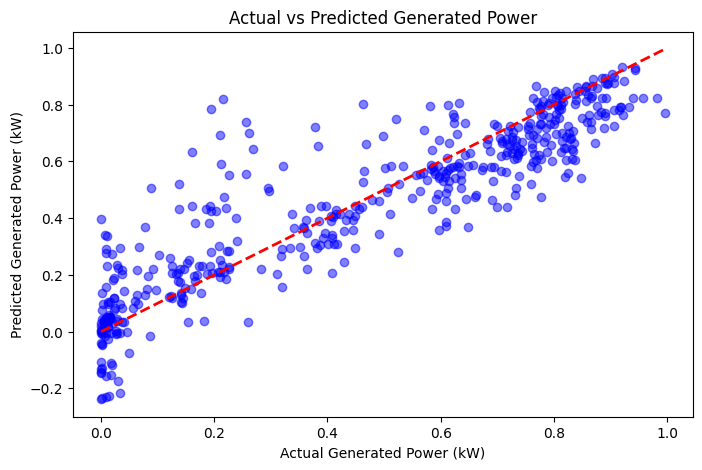

In [134]:
# Scatter plot for actual vs predicted values
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_test_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # 45-degree line
plt.xlabel("Actual Generated Power (kW)")
plt.ylabel("Predicted Generated Power (kW)")
plt.title("Actual vs Predicted Generated Power")
plt.show()